### CASE STUDY: CUSTOMER ANALYSIS FOR RETAIL

### Business Problem:

### A Retail store is required to analyze the day-to-day transactions and keep a track of its customers spread across various locations along with their purchases/returns across various categories.  

### Problem no. 1:
### Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. 
### Ensure to keep all customers who have done transactions with us and select the join type accordingly.

### Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
Customers = pd.read_csv('Customer.csv')

In [3]:
Customers.shape

(5647, 4)

In [4]:
Transactions = pd.read_csv('Transactions.csv')

In [5]:
Transactions.shape

(23053, 10)

In [6]:
Product_Hierarchy = pd.read_csv('prod_cat_info.csv')

In [7]:
Product_Hierarchy.shape

(23, 4)

In [8]:
#Problem no. 1:
#Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. 
#Ensure to keep all customers who have done transactions with us and select the join type accordingly.

df = pd.merge(left = Customers, right = Transactions, left_on = 'customer_Id', right_on = 'cust_id', how = 'left')
pd.options.display.float_format = '{:.2f}'.format
df

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,268408,02-01-1970,M,4.00,87243835584.00,268408.00,13-01-2014,7.00,5.00,5.00,187.00,98.17,1033.17,TeleShop
1,268408,02-01-1970,M,4.00,16197868036.00,268408.00,16-12-2013,1.00,4.00,-5.00,-210.00,110.25,-1160.25,Flagship store
2,268408,02-01-1970,M,4.00,16197868036.00,268408.00,12/12/2013,1.00,4.00,5.00,210.00,110.25,1160.25,Flagship store
3,268408,02-01-1970,M,4.00,28810141075.00,268408.00,2/9/2013,10.00,6.00,2.00,813.00,170.73,1796.73,TeleShop
4,268408,02-01-1970,M,4.00,64633435931.00,268408.00,6/5/2013,4.00,2.00,3.00,312.00,98.28,1034.28,Flagship store
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23189,269626,27-12-1992,F,5.00,71369029396.00,269626.00,18-10-2011,12.00,6.00,1.00,638.00,66.99,704.99,e-Shop
23190,269626,27-12-1992,F,5.00,94134051896.00,269626.00,7/7/2011,3.00,1.00,3.00,1078.00,339.57,3573.57,MBR
23191,274308,29-12-1992,F,5.00,26208690928.00,274308.00,22-10-2012,1.00,2.00,2.00,898.00,188.58,1984.58,MBR
23192,274308,29-12-1992,F,5.00,57358822237.00,274308.00,5/9/2012,1.00,2.00,4.00,876.00,367.92,3871.92,e-Shop


In [9]:
Product_Hierarchy.rename(columns = {'prod_sub_cat_code': 'prod_subcat_code'}, inplace = True)
Product_Hierarchy.head()

,prod_cat_code,prod_cat,prod_subcat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [10]:
Customer_Final = pd.merge(left = df, right = Product_Hierarchy, on = ['prod_cat_code', 'prod_subcat_code'], how = 'inner')

In [11]:
Customer_Final

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,02-01-1970,M,4.00,87243835584.00,268408.00,13-01-2014,7.00,5.00,5.00,187.00,98.17,1033.17,TeleShop,Books,Fiction
1,275152,16-01-1970,M,4.00,73109425404.00,275152.00,25-03-2011,7.00,5.00,2.00,464.00,97.44,1025.44,e-Shop,Books,Fiction
2,275034,18-01-1970,F,4.00,64777271023.00,275034.00,23-05-2011,7.00,5.00,2.00,197.00,41.37,435.37,Flagship store,Books,Fiction
3,270829,22-01-1970,F,8.00,87174343938.00,270829.00,9/12/2013,7.00,5.00,4.00,1141.00,479.22,5043.22,e-Shop,Books,Fiction
4,267657,29-01-1970,F,7.00,76242744953.00,267657.00,23-05-2013,7.00,5.00,4.00,1020.00,428.40,4508.40,e-Shop,Books,Fiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,267812,04-12-1992,F,1.00,63540378797.00,267812.00,10/10/2012,10.00,5.00,3.00,224.00,70.56,742.56,TeleShop,Books,Non-Fiction
23049,274618,09-12-1992,F,7.00,71793203305.00,274618.00,17-08-2013,10.00,5.00,4.00,691.00,290.22,3054.22,Flagship store,Books,Non-Fiction
23050,268097,15-12-1992,F,7.00,91217108818.00,268097.00,1/2/2012,10.00,5.00,2.00,411.00,86.31,908.31,e-Shop,Books,Non-Fiction
23051,268097,15-12-1992,F,7.00,90114483354.00,268097.00,31-01-2011,10.00,5.00,-4.00,-1408.00,591.36,-6223.36,e-Shop,Books,Non-Fiction


### Problem no. 2:
### 2. Prepare a summary report for the merged data set. 

###  a. Get the column names and their corresponding data types 

In [12]:
Customer_Final.drop('cust_id', axis = 1, inplace=True)

In [13]:
Customer_Final.shape

(23053, 15)

In [14]:
Customer_Final.dtypes

customer_Id           int64
DOB                  object
Gender               object
city_code           float64
transaction_id      float64
tran_date            object
prod_subcat_code    float64
prod_cat_code       float64
Qty                 float64
Rate                float64
Tax                 float64
total_amt           float64
Store_type           object
prod_cat             object
prod_subcat          object
dtype: object

###  b. Top/Bottom 10 observations

In [15]:
Customer_Final.head(10)

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,02-01-1970,M,4.00,87243835584.00,13-01-2014,7.00,5.00,5.00,187.00,98.17,1033.17,TeleShop,Books,Fiction
1,275152,16-01-1970,M,4.00,73109425404.00,25-03-2011,7.00,5.00,2.00,464.00,97.44,1025.44,e-Shop,Books,Fiction
2,275034,18-01-1970,F,4.00,64777271023.00,23-05-2011,7.00,5.00,2.00,197.00,41.37,435.37,Flagship store,Books,Fiction
3,270829,22-01-1970,F,8.00,87174343938.00,9/12/2013,7.00,5.00,4.00,1141.00,479.22,5043.22,e-Shop,Books,Fiction
4,267657,29-01-1970,F,7.00,76242744953.00,23-05-2013,7.00,5.00,4.00,1020.00,428.40,4508.40,e-Shop,Books,Fiction
5,274630,01-02-1970,M,4.00,78357345891.00,11/4/2012,7.00,5.00,1.00,646.00,67.83,713.83,TeleShop,Books,Fiction
6,273541,01-02-1970,M,4.00,23916816961.00,9/2/2013,7.00,5.00,4.00,410.00,172.20,1812.20,e-Shop,Books,Fiction
7,269008,13-02-1970,F,6.00,35560569829.00,9/3/2013,7.00,5.00,1.00,1441.00,151.31,1592.31,e-Shop,Books,Fiction
8,269008,13-02-1970,F,6.00,94033312891.00,26-04-2012,7.00,5.00,5.00,746.00,391.65,4121.65,MBR,Books,Fiction
9,267199,14-02-1970,NaN,2.00,56749259881.00,11/1/2012,7.00,5.00,4.00,1049.00,440.58,4636.58,MBR,Books,Fiction


In [16]:
Customer_Final.tail(10)

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
23043,268914,15-11-1992,F,3.00,1407823655.00,10/6/2011,10.00,5.00,1.00,1252.00,131.46,1383.46,MBR,Books,Non-Fiction
23044,269519,17-11-1992,M,9.00,29719500605.00,24-12-2013,10.00,5.00,4.00,1036.00,435.12,4579.12,TeleShop,Books,Non-Fiction
23045,273524,25-11-1992,F,1.00,25762805863.00,19-11-2012,10.00,5.00,1.00,1401.00,147.10,1548.11,Flagship store,Books,Non-Fiction
23046,272141,02-12-1992,F,10.00,71337087467.00,22-07-2012,10.00,5.00,-3.00,-1422.00,447.93,-4713.93,e-Shop,Books,Non-Fiction
23047,272141,02-12-1992,F,10.00,71337087467.00,16-07-2012,10.00,5.00,3.00,1422.00,447.93,4713.93,e-Shop,Books,Non-Fiction
23048,267812,04-12-1992,F,1.00,63540378797.00,10/10/2012,10.00,5.00,3.00,224.00,70.56,742.56,TeleShop,Books,Non-Fiction
23049,274618,09-12-1992,F,7.00,71793203305.00,17-08-2013,10.00,5.00,4.00,691.00,290.22,3054.22,Flagship store,Books,Non-Fiction
23050,268097,15-12-1992,F,7.00,91217108818.00,1/2/2012,10.00,5.00,2.00,411.00,86.31,908.31,e-Shop,Books,Non-Fiction
23051,268097,15-12-1992,F,7.00,90114483354.00,31-01-2011,10.00,5.00,-4.00,-1408.00,591.36,-6223.36,e-Shop,Books,Non-Fiction
23052,268097,15-12-1992,F,7.00,90114483354.00,26-01-2011,10.00,5.00,4.00,1408.00,591.36,6223.36,e-Shop,Books,Non-Fiction


###  c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max) 

In [17]:
Customer_Final.describe()

,customer_Id,city_code,transaction_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt
count,23053.00,23045.00,23053.00,23053.00,23053.00,23053.00,23053.00,23053.00,23053.00
mean,271021.75,5.48,50073480358.45,6.15,3.76,2.43,636.37,248.67,2107.31
std,2431.69,2.86,28981936062.00,3.73,1.68,2.27,622.36,187.18,2507.56
min,266783.00,1.00,3268991.00,1.00,1.00,-5.00,-1499.00,7.35,-8270.92
25%,268935.00,3.00,24938639453.00,3.00,2.00,1.00,312.00,98.28,762.45
50%,270980.00,5.00,50093131361.00,5.00,4.00,3.00,710.00,199.08,1754.74
75%,273114.00,8.00,75329995679.00,10.00,5.00,4.00,1109.00,365.71,3569.15
max,275265.00,10.00,99987549630.00,12.00,6.00,5.00,1500.00,787.50,8287.50


### d. Frequency tables for all the categorical variables 

In [18]:
Customer_Final.loc[:, (Customer_Final.dtypes == 'object')].describe()

,DOB,Gender,tran_date,Store_type,prod_cat,prod_subcat
count,23053,23044,23053,23053,23053,23053
unique,3987,2,1129,4,6,18
top,17-09-1982,M,13-07-2011,e-Shop,Books,Women
freq,32,11811,35,9311,6069,3048


### Problem no. 3:
### 3. Generate histograms for all continuous variables and frequency bars for categorical variables. 

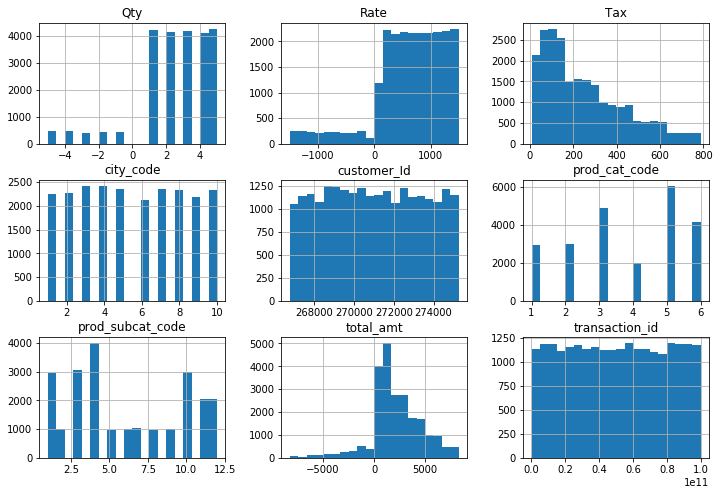

In [19]:
Customer_Final.hist(bins = 20, figsize=(12,8))
plt.show()

In [20]:
Customer_Final.loc[:, (Customer_Final.dtypes == 'object')].head()

,DOB,Gender,tran_date,Store_type,prod_cat,prod_subcat
0,02-01-1970,M,13-01-2014,TeleShop,Books,Fiction
1,16-01-1970,M,25-03-2011,e-Shop,Books,Fiction
2,18-01-1970,F,23-05-2011,Flagship store,Books,Fiction
3,22-01-1970,F,9/12/2013,e-Shop,Books,Fiction
4,29-01-1970,F,23-05-2013,e-Shop,Books,Fiction


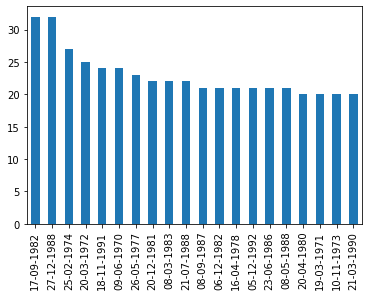

In [21]:
Customer_Final['DOB'].value_counts()[:20].plot(kind='bar')

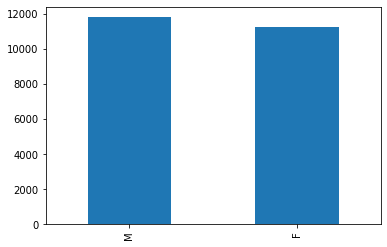

In [22]:
Customer_Final['Gender'].value_counts().plot(kind='bar')

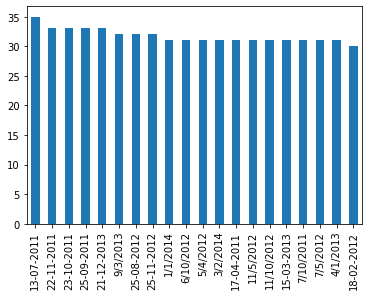

In [23]:
Customer_Final['tran_date'].value_counts()[:20].plot(kind='bar')

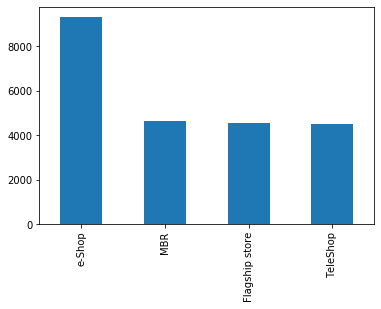

In [24]:
Customer_Final['Store_type'].value_counts().plot(kind = 'bar')

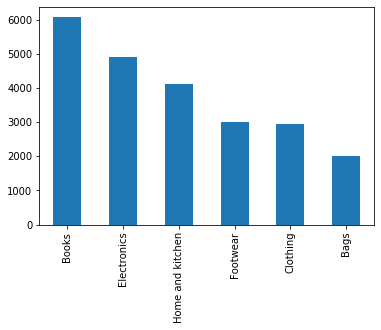

In [25]:
Customer_Final['prod_cat'].value_counts().plot(kind='bar')

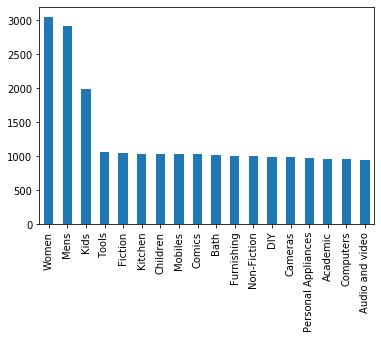

In [26]:
Customer_Final['prod_subcat'].value_counts().plot(kind='bar')

### Problem no. 4:
### 4. Calculate the following information using the merged dataset : 

###  a. Time period of the available transaction data 

In [27]:
from datetime import datetime

In [28]:
Customer_Final['tran_date'] = pd.to_datetime(Customer_Final.tran_date)
time_period = pd.to_timedelta(Customer_Final['tran_date'][0] - Customer_Final['tran_date'][23052])
time_period

Timedelta('1083 days 00:00:00')

###  b. Count of transactions where the total amount of transaction was negative 

In [29]:
Customer_Final.loc[(Customer_Final.total_amt < 0), ['total_amt']].count()

total_amt    2177
dtype: int64

### Problem no. 5:
### 5. Analyze which product categories are more popular among females vs male customers. 

In [30]:
Customer_Final.loc[(Customer_Final.Gender == 'F'), ['prod_cat']].describe()

,prod_cat
count,11233
unique,6
top,Books
freq,2949


In [31]:
Customer_Final.loc[(Customer_Final.Gender == 'M'), ['prod_cat']].describe()

,prod_cat
count,11811
unique,6
top,Books
freq,3116


### As we can observe from above analysis that prod_cat 'Books' is most popular among Male and Female customers.

### Problem no. 6:
### 6. Which City code has the maximum customers and what was the percentage of customers from that city? 

In [32]:
Customer_Final['city_code'].value_counts()

4.00     2422
3.00     2411
5.00     2360
7.00     2356
10.00    2333
8.00     2330
2.00     2270
1.00     2258
9.00     2178
6.00     2127
Name: city_code, dtype: int64

### As we can see from above observation that city_code = 4.0 has the maximum customers.

In [33]:
Customer_Final['city_code'].value_counts().sum()

23045

In [34]:
perc_of_customers = (Customer_Final['city_code'].value_counts())/(Customer_Final['city_code'].value_counts().sum()) *100
perc_of_customers.apply('{:.2f}%'.format)

4.00     10.51%
3.00     10.46%
5.00     10.24%
7.00     10.22%
10.00    10.12%
8.00     10.11%
2.00      9.85%
1.00      9.80%
9.00      9.45%
6.00      9.23%
Name: city_code, dtype: object

### Problem no. 7:
### 7. Which store type sells the maximum products by value and by quantity? 

In [35]:
Customer_Final['Store_type'].value_counts()

e-Shop            9311
MBR               4661
Flagship store    4577
TeleShop          4504
Name: Store_type, dtype: int64

### Note: Based on value type of store maximum products are sold by shop category 'e-Shop'

In [36]:
Customer_Final.nlargest(1, ['Qty'])

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,02-01-1970,M,4.00,87243835584.00,2014-01-13,7.00,5.00,5.00,187.00,98.17,1033.17,TeleShop,Books,Fiction


### Note: Based on quantity of products maximum is sold by shop category 'TeleShop'

### Problem no. 8:
### 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores? 

In [37]:
Customer_Final[(Customer_Final.prod_cat == 'Electronics') & (Customer_Final.Store_type == 'Flagship store') | (Customer_Final.prod_cat == 'Clothing') & (Customer_Final.Store_type == 'Flagship store')][['total_amt','Store_type', 'prod_cat']]

,total_amt,Store_type,prod_cat
4095,3607.82,Flagship store,Electronics
4100,2320.50,Flagship store,Electronics
4101,2419.95,Flagship store,Electronics
4106,1023.23,Flagship store,Electronics
4107,1559.15,Flagship store,Electronics
...,...,...,...
22020,447.52,Flagship store,Electronics
22025,2707.25,Flagship store,Electronics
22028,4689.62,Flagship store,Electronics
22045,1376.83,Flagship store,Electronics


In [38]:
Customer_Final[(Customer_Final.prod_cat == 'Electronics') & (Customer_Final.Store_type == 'Flagship store') | (Customer_Final.prod_cat == 'Clothing') & (Customer_Final.Store_type == 'Flagship store')].total_amt.sum()

3409559.27

### Problem no. 9: 
### 9. What was the total amount earned from "Male" customers under the "Electronics" category? 

In [39]:
Customer_Final[(Customer_Final.Gender == 'M') & (Customer_Final.prod_cat == 'Electronics')][['Gender', 'prod_cat']]

,Gender,prod_cat
4092,M,Electronics
4095,M,Electronics
4097,M,Electronics
4099,M,Electronics
4100,M,Electronics
...,...,...
22035,M,Electronics
22037,M,Electronics
22038,M,Electronics
22043,M,Electronics


In [40]:
Customer_Final[(Customer_Final.Gender == 'M') & (Customer_Final.prod_cat == 'Electronics')].total_amt.sum()

5703109.425

### Problem no. 10:
### 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts? 

In [41]:
#Customer_Final['transaction_id'] = pd.to_numeric(Customer_Final['transaction_id'])
Customer_Final.dtypes

customer_Id                  int64
DOB                         object
Gender                      object
city_code                  float64
transaction_id             float64
tran_date           datetime64[ns]
prod_subcat_code           float64
prod_cat_code              float64
Qty                        float64
Rate                       float64
Tax                        float64
total_amt                  float64
Store_type                  object
prod_cat                    object
prod_subcat                 object
dtype: object

In [42]:
Customer_Final['transaction_id'] = Customer_Final['transaction_id'].apply(lambda x: '{:.2f}'.format(x))
Customer_Final

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,02-01-1970,M,4.00,87243835584.00,2014-01-13,7.00,5.00,5.00,187.00,98.17,1033.17,TeleShop,Books,Fiction
1,275152,16-01-1970,M,4.00,73109425404.00,2011-03-25,7.00,5.00,2.00,464.00,97.44,1025.44,e-Shop,Books,Fiction
2,275034,18-01-1970,F,4.00,64777271023.00,2011-05-23,7.00,5.00,2.00,197.00,41.37,435.37,Flagship store,Books,Fiction
3,270829,22-01-1970,F,8.00,87174343938.00,2013-09-12,7.00,5.00,4.00,1141.00,479.22,5043.22,e-Shop,Books,Fiction
4,267657,29-01-1970,F,7.00,76242744953.00,2013-05-23,7.00,5.00,4.00,1020.00,428.40,4508.40,e-Shop,Books,Fiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,267812,04-12-1992,F,1.00,63540378797.00,2012-10-10,10.00,5.00,3.00,224.00,70.56,742.56,TeleShop,Books,Non-Fiction
23049,274618,09-12-1992,F,7.00,71793203305.00,2013-08-17,10.00,5.00,4.00,691.00,290.22,3054.22,Flagship store,Books,Non-Fiction
23050,268097,15-12-1992,F,7.00,91217108818.00,2012-01-02,10.00,5.00,2.00,411.00,86.31,908.31,e-Shop,Books,Non-Fiction
23051,268097,15-12-1992,F,7.00,90114483354.00,2011-01-31,10.00,5.00,-4.00,-1408.00,591.36,-6223.36,e-Shop,Books,Non-Fiction


In [43]:
Customer_Final['transaction_id'] = pd.to_numeric(Customer_Final['transaction_id'])
Customer_Final.dtypes
pd.options.display.float_format = '{:.2f}'.format

In [44]:
Customer_Final = Customer_Final[Customer_Final.total_amt > 0]
Customer_Final

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,02-01-1970,M,4.00,87243835584.00,2014-01-13,7.00,5.00,5.00,187.00,98.17,1033.17,TeleShop,Books,Fiction
1,275152,16-01-1970,M,4.00,73109425404.00,2011-03-25,7.00,5.00,2.00,464.00,97.44,1025.44,e-Shop,Books,Fiction
2,275034,18-01-1970,F,4.00,64777271023.00,2011-05-23,7.00,5.00,2.00,197.00,41.37,435.37,Flagship store,Books,Fiction
3,270829,22-01-1970,F,8.00,87174343938.00,2013-09-12,7.00,5.00,4.00,1141.00,479.22,5043.22,e-Shop,Books,Fiction
4,267657,29-01-1970,F,7.00,76242744953.00,2013-05-23,7.00,5.00,4.00,1020.00,428.40,4508.40,e-Shop,Books,Fiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23047,272141,02-12-1992,F,10.00,71337087467.00,2012-07-16,10.00,5.00,3.00,1422.00,447.93,4713.93,e-Shop,Books,Non-Fiction
23048,267812,04-12-1992,F,1.00,63540378797.00,2012-10-10,10.00,5.00,3.00,224.00,70.56,742.56,TeleShop,Books,Non-Fiction
23049,274618,09-12-1992,F,7.00,71793203305.00,2013-08-17,10.00,5.00,4.00,691.00,290.22,3054.22,Flagship store,Books,Non-Fiction
23050,268097,15-12-1992,F,7.00,91217108818.00,2012-01-02,10.00,5.00,2.00,411.00,86.31,908.31,e-Shop,Books,Non-Fiction


In [45]:
grouped_data = Customer_Final.groupby('customer_Id')['transaction_id'].agg('count').reset_index()

In [46]:
grouped_data[grouped_data.transaction_id > 10]

,customer_Id,transaction_id
4,266794,11
2426,270535,11
2606,270803,11
3867,272741,11
4032,273014,11
4815,274227,11


In [47]:
grouped_data[grouped_data.transaction_id > 10].count()

customer_Id       6
transaction_id    6
dtype: int64

### As per above count value we have 6 customers with  more than 10 unique transactions

### Problem no. 11:
### 11. For all customers aged between 25 - 35, find out: 

###  a. What was the total amount spent for “Electronics” and “Books” product categories? 

In [48]:
Customer_Final.head()

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,02-01-1970,M,4.00,87243835584.00,2014-01-13,7.00,5.00,5.00,187.00,98.17,1033.17,TeleShop,Books,Fiction
1,275152,16-01-1970,M,4.00,73109425404.00,2011-03-25,7.00,5.00,2.00,464.00,97.44,1025.44,e-Shop,Books,Fiction
2,275034,18-01-1970,F,4.00,64777271023.00,2011-05-23,7.00,5.00,2.00,197.00,41.37,435.37,Flagship store,Books,Fiction
3,270829,22-01-1970,F,8.00,87174343938.00,2013-09-12,7.00,5.00,4.00,1141.00,479.22,5043.22,e-Shop,Books,Fiction
4,267657,29-01-1970,F,7.00,76242744953.00,2013-05-23,7.00,5.00,4.00,1020.00,428.40,4508.40,e-Shop,Books,Fiction


In [49]:
Customer_Final['DOB'] = pd.to_datetime(Customer_Final.DOB)
Customer_Final.dtypes

C:\Users\nanda\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


customer_Id                  int64
DOB                 datetime64[ns]
Gender                      object
city_code                  float64
transaction_id             float64
tran_date           datetime64[ns]
prod_subcat_code           float64
prod_cat_code              float64
Qty                        float64
Rate                       float64
Tax                        float64
total_amt                  float64
Store_type                  object
prod_cat                    object
prod_subcat                 object
dtype: object

In [50]:
now = pd.to_datetime('now')
now

Timestamp('2020-02-15 06:00:36.046304')

In [51]:
Customer_Final.head()

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,1970-02-01,M,4.00,87243835584.00,2014-01-13,7.00,5.00,5.00,187.00,98.17,1033.17,TeleShop,Books,Fiction
1,275152,1970-01-16,M,4.00,73109425404.00,2011-03-25,7.00,5.00,2.00,464.00,97.44,1025.44,e-Shop,Books,Fiction
2,275034,1970-01-18,F,4.00,64777271023.00,2011-05-23,7.00,5.00,2.00,197.00,41.37,435.37,Flagship store,Books,Fiction
3,270829,1970-01-22,F,8.00,87174343938.00,2013-09-12,7.00,5.00,4.00,1141.00,479.22,5043.22,e-Shop,Books,Fiction
4,267657,1970-01-29,F,7.00,76242744953.00,2013-05-23,7.00,5.00,4.00,1020.00,428.40,4508.40,e-Shop,Books,Fiction


In [52]:
Customer_Final['age'] = (now.year - Customer_Final['DOB'].dt.year) - ((now.month - Customer_Final['DOB'].dt.month) < 0)

C:\Users\nanda\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [53]:
Customer_Final

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,age
0,268408,1970-02-01,M,4.00,87243835584.00,2014-01-13,7.00,5.00,5.00,187.00,98.17,1033.17,TeleShop,Books,Fiction,50
1,275152,1970-01-16,M,4.00,73109425404.00,2011-03-25,7.00,5.00,2.00,464.00,97.44,1025.44,e-Shop,Books,Fiction,50
2,275034,1970-01-18,F,4.00,64777271023.00,2011-05-23,7.00,5.00,2.00,197.00,41.37,435.37,Flagship store,Books,Fiction,50
3,270829,1970-01-22,F,8.00,87174343938.00,2013-09-12,7.00,5.00,4.00,1141.00,479.22,5043.22,e-Shop,Books,Fiction,50
4,267657,1970-01-29,F,7.00,76242744953.00,2013-05-23,7.00,5.00,4.00,1020.00,428.40,4508.40,e-Shop,Books,Fiction,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23047,272141,1992-02-12,F,10.00,71337087467.00,2012-07-16,10.00,5.00,3.00,1422.00,447.93,4713.93,e-Shop,Books,Non-Fiction,28
23048,267812,1992-04-12,F,1.00,63540378797.00,2012-10-10,10.00,5.00,3.00,224.00,70.56,742.56,TeleShop,Books,Non-Fiction,27
23049,274618,1992-09-12,F,7.00,71793203305.00,2013-08-17,10.00,5.00,4.00,691.00,290.22,3054.22,Flagship store,Books,Non-Fiction,27
23050,268097,1992-12-15,F,7.00,91217108818.00,2012-01-02,10.00,5.00,2.00,411.00,86.31,908.31,e-Shop,Books,Non-Fiction,27


In [54]:
age_df = Customer_Final[(Customer_Final.age >= 25) & (Customer_Final.age <= 35)] 
age_df

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,age
637,268735,1984-05-01,M,10.00,30010342954.00,2011-06-17,7.00,5.00,4.00,1256.00,527.52,5551.52,Flagship store,Books,Fiction,35
638,270884,1984-03-02,M,3.00,45919126226.00,2012-01-13,7.00,5.00,5.00,1115.00,585.38,6160.38,MBR,Books,Fiction,35
639,269085,1984-03-02,M,8.00,17923961107.00,2011-02-08,7.00,5.00,4.00,803.00,337.26,3549.26,e-Shop,Books,Fiction,35
640,274624,1984-05-02,M,4.00,69899569258.00,2012-11-27,7.00,5.00,2.00,1173.00,246.33,2592.33,TeleShop,Books,Fiction,35
641,274624,1984-05-02,M,4.00,3098791267.00,2011-05-23,7.00,5.00,5.00,1325.00,695.62,7320.62,e-Shop,Books,Fiction,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23047,272141,1992-02-12,F,10.00,71337087467.00,2012-07-16,10.00,5.00,3.00,1422.00,447.93,4713.93,e-Shop,Books,Non-Fiction,28
23048,267812,1992-04-12,F,1.00,63540378797.00,2012-10-10,10.00,5.00,3.00,224.00,70.56,742.56,TeleShop,Books,Non-Fiction,27
23049,274618,1992-09-12,F,7.00,71793203305.00,2013-08-17,10.00,5.00,4.00,691.00,290.22,3054.22,Flagship store,Books,Non-Fiction,27
23050,268097,1992-12-15,F,7.00,91217108818.00,2012-01-02,10.00,5.00,2.00,411.00,86.31,908.31,e-Shop,Books,Non-Fiction,27


In [55]:
age_df[(age_df.prod_cat == 'Electronics') | (age_df.prod_cat == 'Books')]

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,age
637,268735,1984-05-01,M,10.00,30010342954.00,2011-06-17,7.00,5.00,4.00,1256.00,527.52,5551.52,Flagship store,Books,Fiction,35
638,270884,1984-03-02,M,3.00,45919126226.00,2012-01-13,7.00,5.00,5.00,1115.00,585.38,6160.38,MBR,Books,Fiction,35
639,269085,1984-03-02,M,8.00,17923961107.00,2011-02-08,7.00,5.00,4.00,803.00,337.26,3549.26,e-Shop,Books,Fiction,35
640,274624,1984-05-02,M,4.00,69899569258.00,2012-11-27,7.00,5.00,2.00,1173.00,246.33,2592.33,TeleShop,Books,Fiction,35
641,274624,1984-05-02,M,4.00,3098791267.00,2011-05-23,7.00,5.00,5.00,1325.00,695.62,7320.62,e-Shop,Books,Fiction,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23047,272141,1992-02-12,F,10.00,71337087467.00,2012-07-16,10.00,5.00,3.00,1422.00,447.93,4713.93,e-Shop,Books,Non-Fiction,28
23048,267812,1992-04-12,F,1.00,63540378797.00,2012-10-10,10.00,5.00,3.00,224.00,70.56,742.56,TeleShop,Books,Non-Fiction,27
23049,274618,1992-09-12,F,7.00,71793203305.00,2013-08-17,10.00,5.00,4.00,691.00,290.22,3054.22,Flagship store,Books,Non-Fiction,27
23050,268097,1992-12-15,F,7.00,91217108818.00,2012-01-02,10.00,5.00,2.00,411.00,86.31,908.31,e-Shop,Books,Non-Fiction,27


In [56]:
age_df[(age_df.prod_cat == 'Electronics') | (age_df.prod_cat == 'Books')]['total_amt'].sum()

10161998.795

###    b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?


In [57]:
age_df['tran_date'] = pd.to_datetime(age_df.tran_date)

C:\Users\nanda\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [58]:
age_df.dtypes

customer_Id                  int64
DOB                 datetime64[ns]
Gender                      object
city_code                  float64
transaction_id             float64
tran_date           datetime64[ns]
prod_subcat_code           float64
prod_cat_code              float64
Qty                        float64
Rate                       float64
Tax                        float64
total_amt                  float64
Store_type                  object
prod_cat                    object
prod_subcat                 object
age                          int64
dtype: object

In [59]:
mask = (age_df['tran_date'] > '2014-01-01') & (age_df['tran_date'] <= '2014-03-01')

In [60]:
age_df = age_df.loc[mask]
age_df

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,age
649,272423,1984-08-04,F,6.00,88772483334.00,2014-01-18,7.00,5.00,1.00,213.00,22.36,235.37,e-Shop,Books,Fiction,35
686,274991,1985-03-21,M,8.00,49916924033.00,2014-01-18,7.00,5.00,3.00,527.00,166.00,1747.01,MBR,Books,Fiction,34
724,270253,1985-12-28,M,5.00,33430226218.00,2014-01-23,7.00,5.00,4.00,1172.00,492.24,5180.24,Flagship store,Books,Fiction,34
759,268565,1986-02-07,F,4.00,11698340645.00,2014-01-22,7.00,5.00,4.00,295.00,123.90,1303.90,e-Shop,Books,Fiction,34
805,274923,1987-08-09,M,8.00,21647178150.00,2014-01-29,7.00,5.00,5.00,812.00,426.30,4486.30,Flagship store,Books,Fiction,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22043,267094,1992-11-24,M,9.00,12905992307.00,2014-01-26,5.00,3.00,1.00,1449.00,152.15,1601.14,e-Shop,Electronics,Computers,27
22895,269162,1989-05-29,M,3.00,19729968655.00,2014-02-16,10.00,5.00,2.00,721.00,151.41,1593.41,e-Shop,Books,Non-Fiction,30
22922,269637,1989-10-12,F,1.00,42879420828.00,2014-01-14,10.00,5.00,1.00,778.00,81.69,859.69,MBR,Books,Non-Fiction,30
22959,272165,1990-01-12,M,4.00,91039584326.00,2014-02-01,10.00,5.00,1.00,1268.00,133.14,1401.14,e-Shop,Books,Non-Fiction,30


In [61]:
age_df.total_amt.sum()

637852.41